## Plot BlandAtman for all subjects

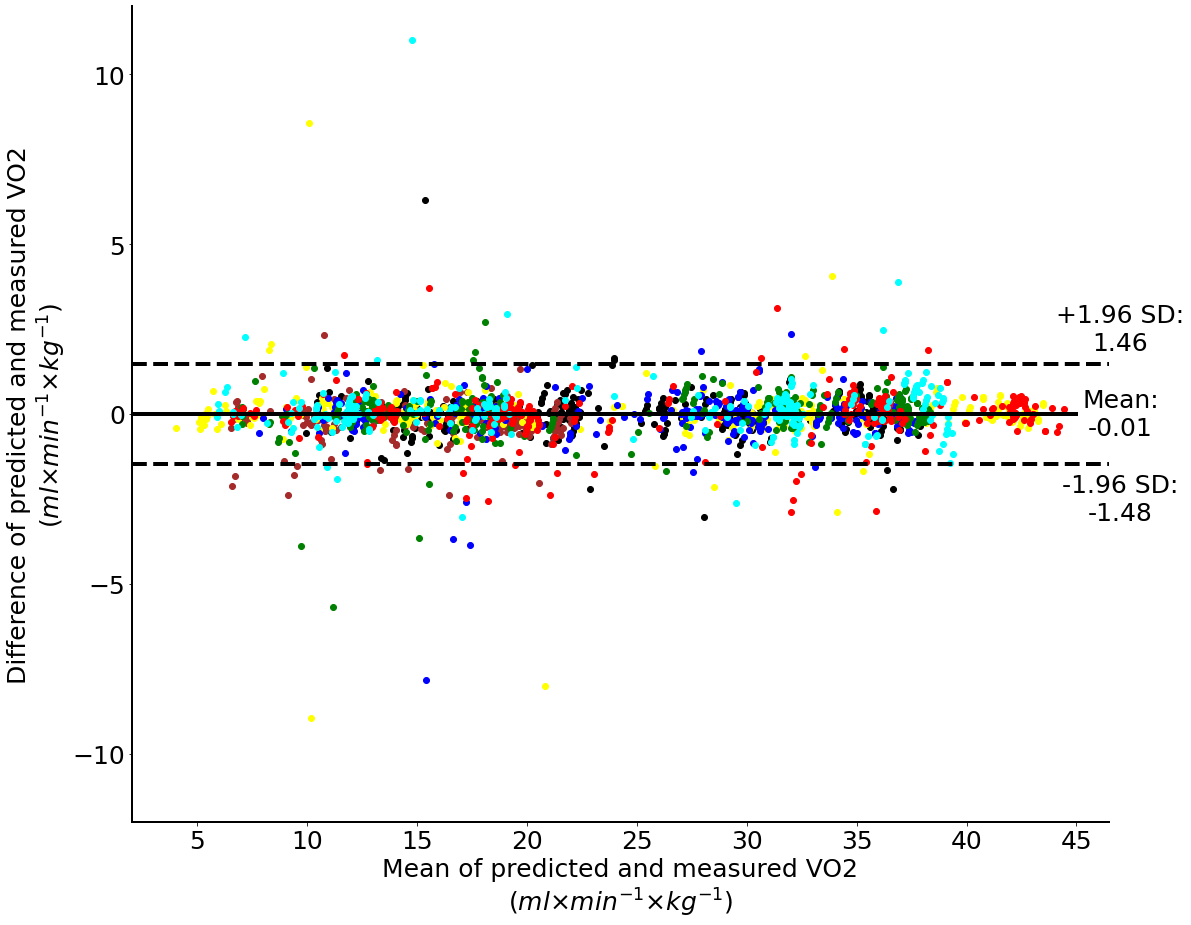

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
colors = np.array(["cyan","red","green","blue","yellow","brown","black","orange","magenta","purple","gray"])

#a=np.array([1,2,3,4])
#print(a)
#res1=np.array(pd.read_csv('Subj-1-predict.csv'))
#global a
#a=np.vstack((a,res1));
#print(a)
listRes=list()
def readPredict(fileName,i):
    res=np.array(pd.read_csv(fileName,header=None))
    #print(i)
    #print(res)
    listRes.append(res)
    #a=np.vstack((a,res))
    diff_y=res[:,2]
    avg_x=res[:,3]
    plt.scatter(avg_x,diff_y,color=colors[i-9],label='subj'+str(i))

plt.figure(figsize=(17.5,15))

i=15;
while i >= 9:        
    fileName='Subj-'+str(i)+'-predict-wHR.csv'
    readPredict(fileName,i)
    i=i-1

resStack = np.vstack(listRes)
VO2_hat=np.array(resStack[:,0])
VO2=np.array(resStack[:,1])
mean=np.mean([VO2_hat, VO2],axis=0)
diff=VO2_hat - VO2
md=np.mean(diff)
sd=np.std(diff,axis=0)
upLim=md + 1.96*sd
downLim=md - 1.96*sd

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$",fontsize=15)


plt.axhline(upLim, color='black', linestyle='--',linewidth=4)
plt.text(xOutPlot,upLim, r'+1.96 SD:' + "\n" + "%.2f" % upLim, fontsize=25,backgroundcolor='w',ha = "center",va="center"
         ,position=(47,2.5))
plt.axhline(downLim, color='black', linestyle='--',linewidth=4)
plt.text(xOutPlot,downLim, r'-1.96 SD:' + "\n" + "%.2f" % downLim, fontsize=25,backgroundcolor='w',ha = "center",va="center"
        ,position=(47,-2.5))
plt.axhline(md,color='black', linestyle='-',linewidth=4)
plt.text(xOutPlot,md,r'Mean:' + "\n" + "%.2f" % md, fontsize=25,backgroundcolor='w',ha = "center",va="center",position=(47,0))

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylim(-12,12)
#plt.xlim(0,48)
plt.xlabel("Mean of predicted and measured VO2\n"+r"$(ml×min^{-1}×kg^{-1})$",fontsize=25)
plt.ylabel('Difference of predicted and measured VO2\n'+ r"$(ml×min^{-1}×kg^{-1})$",fontsize=25)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
fig = plt.gcf()
fig.savefig('BlandAltman_Nov_subjects_withHR'+'.jpg')
#plt.legend()
plt.show()

## Plot 2 outlined points

In [2]:
a=resStack[:,0:2]
b=a[abs(a[:,0]-a[:,1])>20]
print(b)
diff=b[:,0]-b[:,1]
print(diff)
c=np.mean([b[:,0],b[:,1]],axis=0)
print(c)

plt.figure(figsize=(3,2.8))
#plt.subplot(2,1,1)
plt.scatter(c[0],diff[0],color="green")
#plt.xlim(18.5,19)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


fig = plt.gcf()
fig.savefig('dots1'+'.jpg',bbox_inches='tight')
#plt.subplot(2,1,2)
plt.show()



[]
[]
[]


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 216x201.6 with 0 Axes>

In [ ]:
plt.figure(figsize=(3.0,2.8))
plt.scatter(c[1],diff[1],color="orange")
#plt.xlim(15,25)
#plt.ylim(-25,-30)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

fig = plt.gcf()
fig.savefig('dots2'+'.jpg',bbox_inches='tight')
plt.show()

## Save the final figure

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
bigIm=Image.open('BlandAltman_all_subjects.jpg')
dot1=Image.open('dots1.jpg')
dot2=Image.open('dots2.jpg')

back_im = bigIm.copy()
back_im.paste(dot1,(180,750))
back_im.paste(dot2,(180,150))
#back_im.show()
back_im.save('final.jpg',qualit=95)

## References plot from built-in library

In [ ]:
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(VO2_hat,VO2,ax=ax)
plt.show()
#print(mean)